# Inducible repression

In [10]:
# Standard dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Custom written utilities
import mwc_induction_utils as mwc 

# Set the plotting style
sns.set_context('talk')
mwc.set_plotting_style()
%matplotlib notebook

/Users/gchure/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


##  What about when induction increases repression?

It's pretty much the same deal except $\text{fold-change}$ now becomes 

$$
\begin{align}
\text{fold-change}= \left(1 + \frac{\mathrm{e}^{-\beta\Delta\varepsilon_{AI}}\left(1 + \frac{c}{K_A}\right)^2}{\left(1 + \frac{c}{K_I}\right)^2 + \mathrm{e}^{-\beta\Delta\varepsilon_{AI}}\left(1 + \frac{c}{K_A}\right)^2}\frac{R_A}{N_{NS}}\mathrm{e}^{-\beta\Delta\varepsilon_{RA}}\right)^{-1}
\end{align}
$$

Let's look at the behavior of this expression with swapped $K_A$ and $K_I$ from the repressor case.

In [11]:
# Define a function for fold-change calculation.
def fold_change(num_repressors, c_range, ka, ki, ep_rd, ep_ai=-5, 
                 nonspec_sites=4.6E6, quaternary_state=2, mode='inducer'):
    """
    Computes the fold-change in gene expression for transcription factor induction.
    
    Parameters
    ----------
    num_repressors : int
        Number of functional repressor molecules per cell
    c_range : 1d-array, float or int
        Array of ligand concentrate over which to evaluate the fold-change.
    ka : float
        Dissociation constant for inducer to active repressor. In units of
        concentration.
    ki : float
        Dissociation constant for inducer to inactive repressor. In units of
         concentration.
    ep_rd: float
        Binding energy of repressor to the DNA. This is in units of k_BT
    ep_ai: float
        Energy difference between the active and inactive repressor. This is 
        in units of k_BT. Default value is -4.5.
    nonspec_sites : int
        Number of nonspecific sites for repressor binding. Default value is
        the length of the E. coli genome 4.6E6.
    quaternary_state : int
        Quanternary state of active repressors. Default value is 2. 
    mode: str, 'inducer' or 'corepressor'
        Mode of ligand action. 
    Returns
    -------
    fold_change : 1d-array
        Theoretical fold-change values over all values of ligand concentration 
        c_range.
    """
    
    if mode=='inducer':
        pact_numer = (1 + c_range/ka)**2
        pact_denom = pact_numer + np.exp(ep_ai) * (1 + c_range/ki)**2
    elif mode=='corepressor':
        pact_numer = np.exp(ep_ai) * (1 + c_range/ka)**2
        pact_denom = pact_numer + (1 + c_range/ki)**2
    else:
        raise RuntimeError('ligand mode not properly specified')
        
    fold_change =  (1 + (pact_numer/pact_denom) * 
                    (quaternary_state* num_repressors/nonspec_sites) *
                    np.exp(ep_rd))**-1
    return fold_change

In [12]:
# Now define some parameters
num_rep = 10
c_range = np.logspace(-9, -2, 500)
ka_ind = 150E-6
ki_ind = 500E-9
ka_cor = 500E-9
ki_cor = 150E-6
ep_rd = 15 
ep_ai = -5  
# Pack the args
ind_args = (num_rep, c_range, ka_ind, ki_ind, ep_rd, ep_ai)
cor_args = (num_rep, c_range, ka_cor, ki_cor, ep_rd, ep_ai)

# Compute the fold-change.
ind_fc = fold_change(*ind_args, mode='inducer')
cor_fc = fold_change(*cor_args, mode='corepressor')

<IPython.core.display.Javascript object>


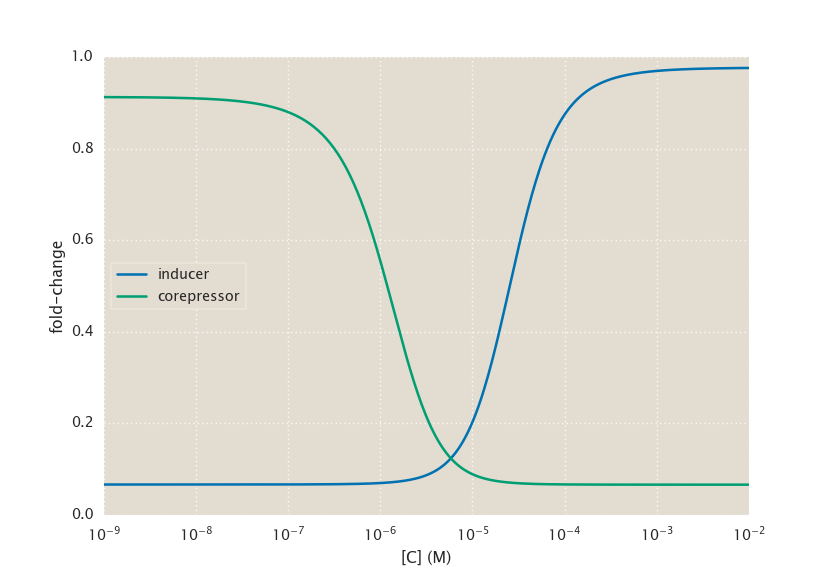

In [13]:
# Plot them.
plt.figure()
plt.plot(c_range, ind_fc, label='inducer', color='b')
plt.plot(c_range, cor_fc, label='corepressor', color='g')
plt.xlabel('[C] (M)')
plt.ylabel('fold-change')
plt.legend(loc='center left')
plt.xscale('log')

Examine the behavior of these curves as we change the ratio of Ka to Ki.

<IPython.core.display.Javascript object>


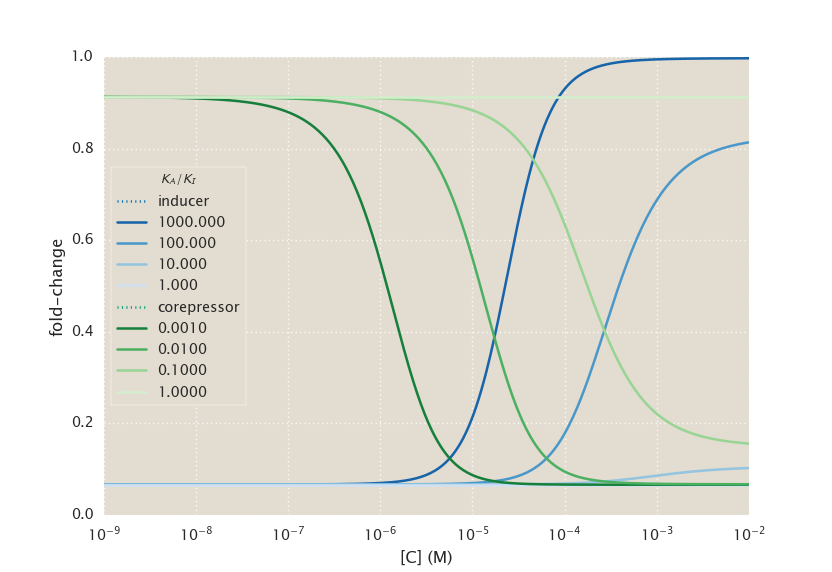

In [14]:
# Tune the ratio of Ka to Ki
num_rep = 10
c_range = np.logspace(-9, -2, 500)
ka_ind = 500E-6 
ki_ind = [500E-9, 500E-8, 500E-7, 500E-6] 
ka_cor = [500E-9, 500E-8, 500E-7, 500E-6] 
ki_cor = 500E-6
ep_rd = 15 
ep_ai = -5

# set the colors.
ind_colors = sns.color_palette('Blues_r', n_colors=4)
cor_colors = sns.color_palette('Greens_r', n_colors=4)

# Perform the plotting.
plt.figure()
plt.plot([], [], ':', color='b', label='inducer')

for i in range(len(ki_ind)):
    ind_args = (num_rep, c_range, ka_ind, ki_ind[i], ep_rd, ep_ai)
    ind_fc = fold_change(*ind_args, mode='inducer')
    plt.plot(c_range, ind_fc,'-', color=ind_colors[i], 
             label='{0:.3f}'.format(ka_ind/ki_ind[i]))
    
plt.plot([], [], ':',color='g', label='corepressor')
for i in range(len(ka_cor)):
    cor_args = (num_rep, c_range, ka_cor[i], ki_cor, ep_rd, ep_ai)
    cor_fc = fold_change(*cor_args, mode='corepressor')
    plt.plot(c_range, cor_fc, '-', color=cor_colors[i],
             label='{0:.4f}'.format(ka_cor[i]/ki_cor))
    
plt.legend(loc='center left', ncol=1, title=r'$K_A$/$K_I$') 
plt.xlabel('[C] (M)', fontsize=15)
plt.ylabel('fold-change', fontsize=15)
plt.xscale('log')

We can also look at the limits of these two modes of allosteric regulation with varying strength of operator binding sites.

In [15]:
# Set up a range of binding energies.
ep_rd = [8, 10, 13, 17, 20]
num_rep = 10
c_range = np.logspace(-9, -2, 500)
ka_ind = 150E-6
ki_ind = 500E-9
ka_cor = 500E-9
ki_cor = 150E-6

ind_colors = sns.color_palette('Blues', n_colors=len(ep_rd))
cor_colors = sns.color_palette('Greens', n_colors=len(ep_rd))

plt.figure()
plt.plot([], [], ':', label='inducer')
for i in range(len(ep_rd)):
    ind_args = (num_rep, c_range, ka_ind, ki_ind, ep_rd[i], ep_ai)
    ind_fc = fold_change(*ind_args, mode='inducer')
    plt.plot(c_range, ind_fc,'-', color=ind_colors[i], 
             label=ep_rd[i])
    
plt.plot([], [], ':', label='corepressor')
for i in range(len(ep_rd)):
    cor_args = (num_rep, c_range, ka_cor, ki_cor, ep_rd[i], ep_ai)
    cor_fc = fold_change(*cor_args, mode='corepressor')
    plt.plot(c_range, cor_fc,'-', color=cor_colors[i], 
             label=ep_rd[i])
    
plt.legend(loc='center right', ncol=1, 
           title=r'$\Delta\varepsilon_{RA}\,\, (k_BT)$', 
          bbox_to_anchor=(1.25,0.7)) 
plt.xlabel('[C] (M)', fontsize=15)
plt.ylabel('fold-change', fontsize=15)
plt.xscale('log')
plt.margins(0.02)

<IPython.core.display.Javascript object>

How does the dynamic range change?

In [16]:
# Set up a range of binding energies.
ep_rd = np.linspace(0, 50, 1000)
num_rep = 10
c_range = np.logspace(-9, -2, 500)
ka_ind = 150E-6
ki_ind = 500E-9
ka_cor = 500E-9
ki_cor = 150E-6

ind_dynamic = np.empty_like(ep_rd)
cor_dynamic = np.empty_like(ep_rd)
for i in range(len(ep_rd)):
    ind_args = (num_rep, c_range, ka_ind, ki_ind, ep_rd[i], ep_ai)
    cor_args = (num_rep, c_range, ka_cor, ki_cor, ep_rd[i], ep_ai)
    ind_fc = fold_change(*ind_args, mode='inducer')
    cor_fc = fold_change(*cor_args, mode='corepressor')
    ind_dynamic[i] = np.abs(ind_fc[-1] - ind_fc[0])
    cor_dynamic[i] = np.abs(cor_fc[-1] - cor_fc[0])
    
# Plot the dynamic range.
plt.figure()
plt.plot(ep_rd, ind_dynamic, 'b-', label='inducer')
plt.plot(ep_rd, cor_dynamic, 'g-', label='corepressor')
# plt.yscale('log')
plt.legend()
plt.xlabel(r'$\Delta\varepsilon_{RA}\,\,(k_BT)$', fontsize=18)
plt.ylabel(r'dynamic range ($\mid \mathrm{fc}_{max} - \mathrm{fc}_{min}\mid$)', fontsize=18)
plt.margins(0.02)

<IPython.core.display.Javascript object>

It seems that the peak dynamic range for the corepressor is less than that for the inducer.

# Look at fold-change contour plots

In [17]:
# Set up the meshgrid.
num_repressors = np.logspace(0, 4, 500)
c_range = np.logspace(-9, -2, 500)
x,y = np.meshgrid(num_repressors, c_range)
X = np.ravel(x)
Y = np.ravel(y)
ind = fold_change(X, Y, ka_ind, ki_ind, 15, mode='inducer')
cor = fold_change(X, Y, ka_cor, ki_cor, 15, mode='corepressor')
ind = np.reshape(ind.T, x.shape)
cor = np.reshape(cor.T, x.shape)

In [18]:
plt.figure()
ax = plt.gca()
plt.imshow(np.rot90(ind), cmap=plt.cm.viridis, extent=[0, 10, 0, 10])
plt.colorbar()


<IPython.core.display.Javascript object>

In [19]:
ax.get_xticks()

array([  0.,   2.,   4.,   6.,   8.,  10.])

###  Plots for biolunch presentation

I want to show that for using some reasonable parameter values, we can predict behavior of this system. 

In [20]:
# Define some parameters
c_range = np.logspace(-9, -2, 500)
rep_range = [10, 50, 100, 300, 500, 1000]
ep_rd_range = [8, 10, 12, 15, 17, 20]
ka_ind = 100E-6
ki_ind = 500E-9

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
colors = sns.color_palette('Blues')
for i, r in enumerate(rep_range):
    ind_args = (r, c_range, ka_ind, ki_ind, 15)
    ind_fc =fold_change(*ind_args, mode='inducer')
    ax[0].plot(c_range, ind_fc, color = colors[i], label=2*r)
colors = sns.color_palette('Reds') 
for i, op in enumerate(ep_rd_range):
    ind_args = (100, c_range, ka_ind, ki_ind, op)
    ind_fc = fold_change(*ind_args, mode='inducer')
    ax[1].plot(c_range, ind_fc, color=colors[i], label=-op)
ax[0].legend(loc='upper left', title='repressors/cell', fontsize=13)
ax[0].set_xlabel('$c$ (M)', fontsize=18)
ax[0].set_ylabel('fold-change', fontsize=18)
ax[1].set_xlabel('$c$ (M)', fontsize=18)
ax[1].legend(loc='upper left', title=r'$\Delta\varepsilon_{RA}\,\,(k_BT)$',
             fontsize=13)
ax[0].set_title(r'fixed $\Delta\varepsilon_{RA}$', fontsize=18)
ax[1].set_title(r'fixed $R$', fontsize=18)
for a in ax:
    a.set_xscale('log')
    a.margins(0.02)
# plt.suptitle(r'$K_A = 100\mu M\,\,\,\, K_I = 0.5\mu M\,\,\,\, \Delta\varepsilon_{AI} = -5\,k_BT$',
#             fontsize=16, y =1.02)
plt.tight_layout()
plt.savefig('/Users/gchure/Desktop/inducer_titration.png',
            dpi=300, bbox_inches='tight')

<IPython.core.display.Javascript object>

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
colors = sns.color_palette('Greens')
for i, r in enumerate(rep_range):
    ind_args = (r, c_range, ki_ind, ka_ind, 15)
    ind_fc =fold_change(*ind_args, mode='corepressor')
    ax[0].plot(c_range, ind_fc, color = colors[i], label=2*r)
colors = sns.color_palette('Purples') 
for i, op in enumerate(ep_rd_range):
    ind_args = (100, c_range, ki_ind, ka_ind, op)
    ind_fc = fold_change(*ind_args, mode='corepressor')
    ax[1].plot(c_range, ind_fc, color=colors[i], label=-op)
ax[0].legend(loc='upper right', title='repressors/cell', fontsize=13)
ax[0].set_xlabel('$c$ (M)', fontsize=18)
ax[0].set_ylabel('fold-change', fontsize=18)
ax[1].set_xlabel('$c$ (M)', fontsize=18)
ax[1].legend(loc='upper right', title=r'$\Delta\varepsilon_{RA}\,\,(k_BT)$',
             fontsize=13)
ax[0].set_title(r'fixed $\Delta\varepsilon_{RA}$', fontsize=18)
ax[1].set_title(r'fixed $R$', fontsize=18)
for a in ax:
    a.set_xscale('log')
    a.margins(0.02)
# plt.suptitle(r'$K_A = 0.5\mu M\,\,\,\, K_I = 100\mu M\,\,\,\, \Delta\varepsilon_{AI} = -5\,k_BT$',
#             fontsize=16, y =1.02)
plt.tight_layout()
plt.savefig('/Users/gchure/Desktop/corepressor_titration.png',
            dpi=300, bbox_inches='tight')

<IPython.core.display.Javascript object>

In [22]:
# Show a plot of all four
fig, ax = plt.subplots(2, 2, figsize=(9, 9), sharex=True, sharey=True)
colors = sns.color_palette('Blues')
ax = ax.ravel()
for i, r in enumerate(rep_range):
    ind_args = (r, c_range, ka_ind, ki_ind, 15)
    ind_fc =fold_change(*ind_args, mode='inducer')
    ax[0].plot(c_range, ind_fc, color = colors[i], label=2*r)
colors = sns.color_palette('Reds') 
for i, op in enumerate(ep_rd_range):
    ind_args = (100, c_range, ka_ind, ki_ind, op)
    ind_fc = fold_change(*ind_args, mode='inducer')
    ax[1].plot(c_range, ind_fc, color=colors[i], label=-op)
ax[0].set_ylabel('induction', fontsize=18)
ax[3].set_ylabel('corepression', fontsize=18)
ax[0].text(0.01, 0.9, r'varying $R$', transform=ax[0].transAxes,
           fontsize=18)
ax[1].text(0.01, 0.9, r'varying r$\Delta\varepsilon_{RA}$', transform=ax[1].transAxes,
           fontsize=18)

colors = sns.color_palette('Greens')
for i, r in enumerate(rep_range):
    ind_args = (r, c_range, ki_ind, ka_ind, 15)
    ind_fc =fold_change(*ind_args, mode='corepressor')
    ax[2].plot(c_range, ind_fc, color = colors[i], label=2*r)
colors = sns.color_palette('Purples') 
for i, op in enumerate(ep_rd_range):
    ind_args = (100, c_range, ki_ind, ka_ind, op)
    ind_fc = fold_change(*ind_args, mode='corepressor')
    ax[3].plot(c_range, ind_fc, color=colors[i], label=-op)

ax[2].set_xlabel('$c$ (M)', fontsize=18)
ax[3].set_xlabel('$c$ (M)', fontsize=18)

for a in ax:
    a.set_xscale('log')
    a.margins(0.02)
fig.text(0, 0.5, 'fold-change', va='center', rotation='vertical', fontsize=20)
plt.savefig('/Users/gchure/Desktop/induction_corepression.png', dpi=300, bbox_inches='tight')

<IPython.core.display.Javascript object>